# Heart Failure Prediction Assignment

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions¶

# 1. Data Exploration (EDA)
# Task 1: Load the dataset using pandas and display the first few rows.

In [5]:
df=pd.read_csv("heart failure.csv")

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.shape

(299, 13)

In [12]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Task 2: Check for missing values and clean the data if necessary.

In [17]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Task 3: Generate summary statistics for the numerical columns.

In [20]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Task 4: Visualize the distribution of the target variable (DEATH_EVENT).

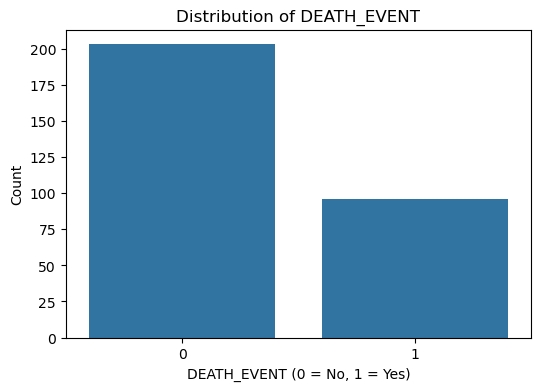

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Task 5: Plot histograms or box plots for continuous variables like age, creatinine_phosphokinase, ejection_fraction, serum_creatinine, etc.

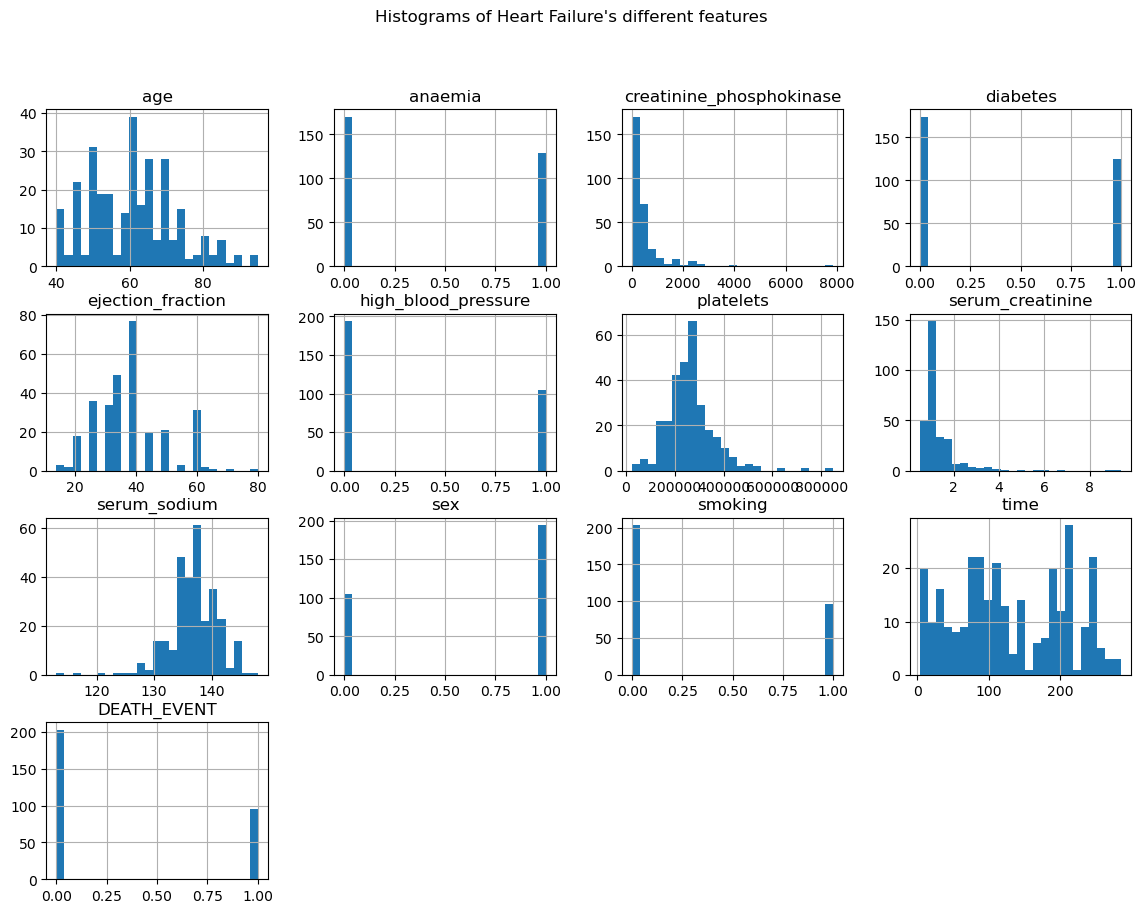

In [26]:
df.hist(bins=25, figsize=(14, 10))
plt.suptitle("Histograms of Heart Failure's different features")
plt.show()

# 2. Data Visualization
# Task 6: Create a correlation matrix heatmap to understand the relationships between the features.


In [28]:
correlation_matrix = df.corr()

In [29]:
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [30]:
death_corr=correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)
print("Correlation with Death Event(DEATH_EVENT): ")
print(death_corr)

Correlation with Death Event(DEATH_EVENT): 
DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


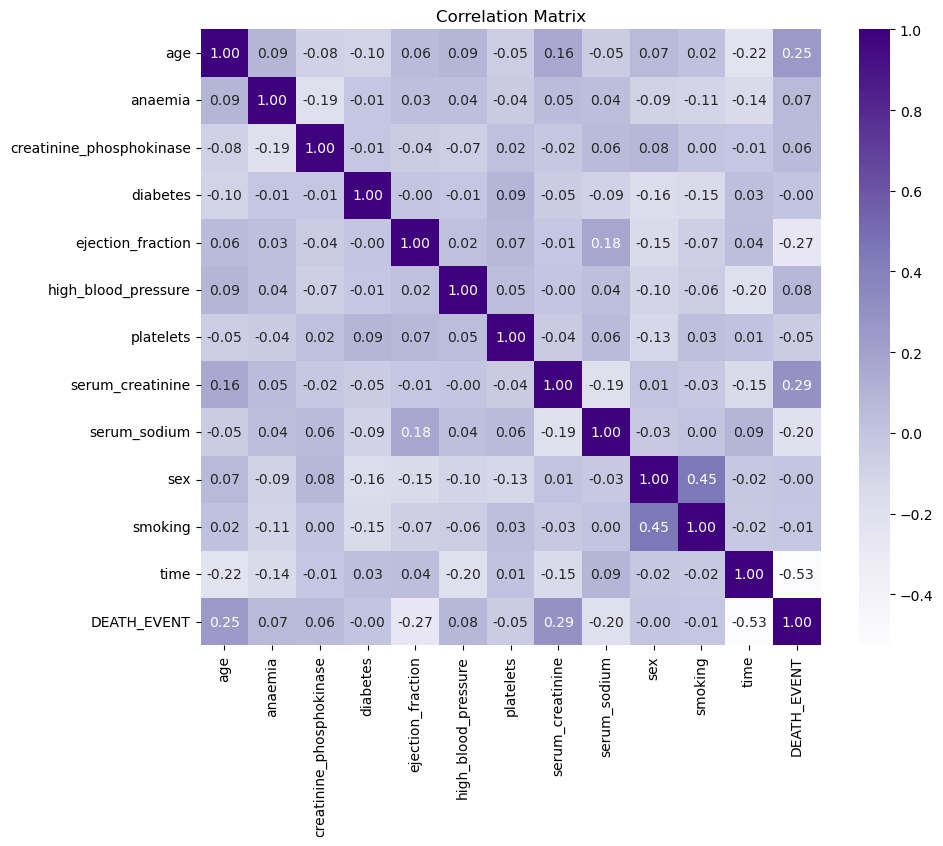

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Task 7: Create count plots or bar charts for categorical variables like anaemia, diabetes, high_blood_pressure, sex, and smoking.

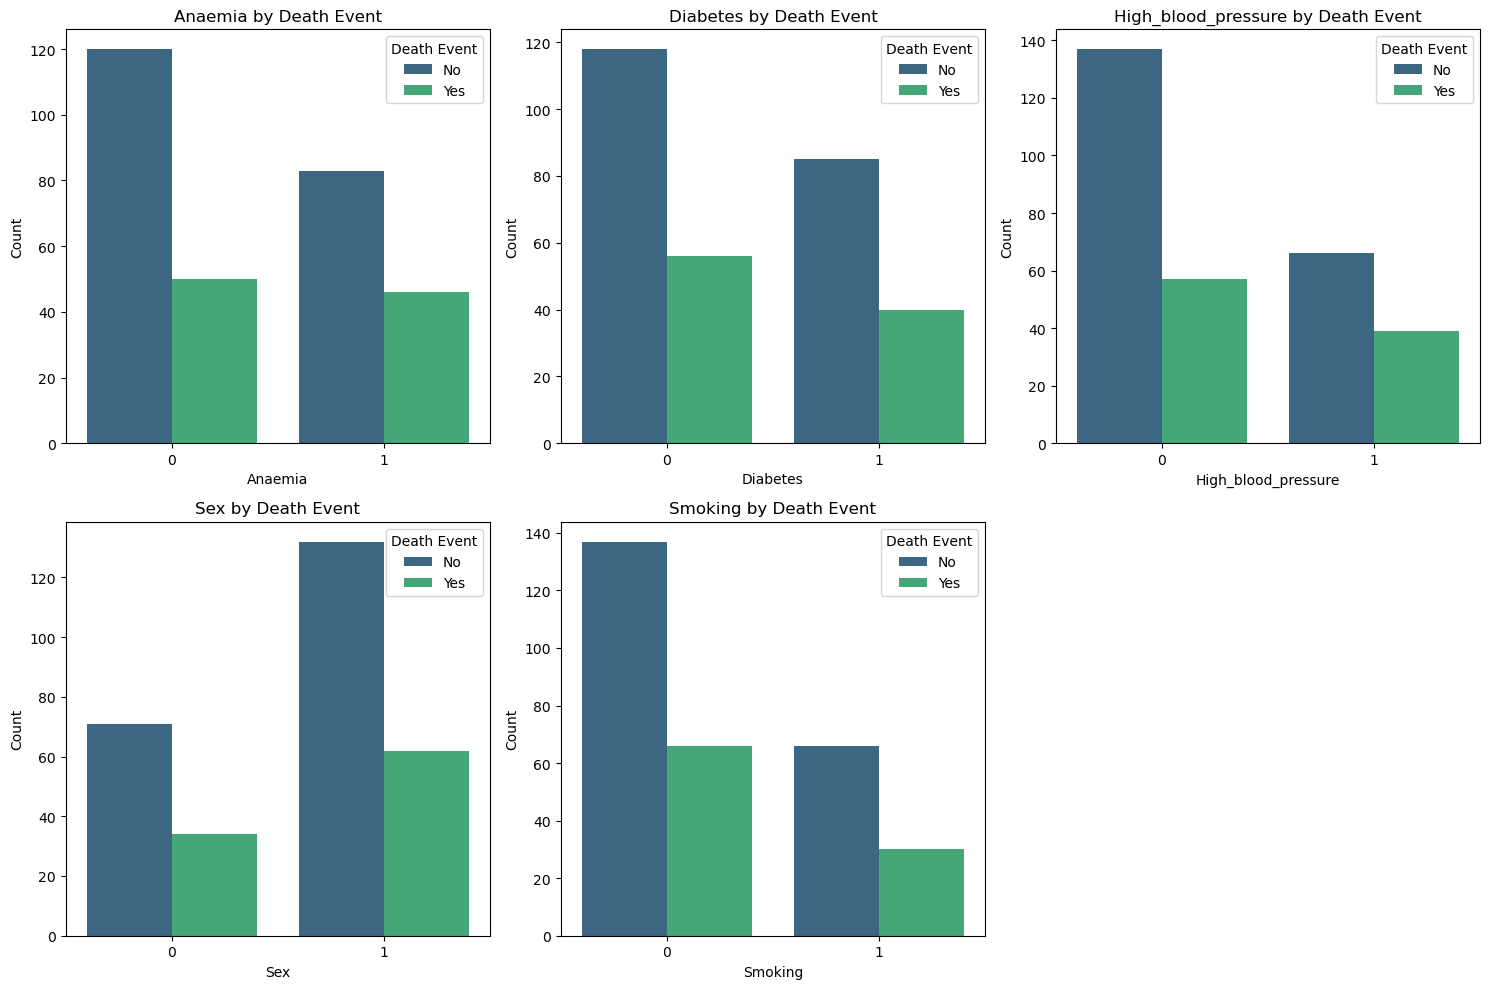

In [37]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i) 
    sns.countplot(data=df, x=var, hue='DEATH_EVENT', palette='viridis')
    plt.title(var.capitalize()+" by Death Event")
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Death Event', labels=['No', 'Yes'])  

plt.tight_layout()
plt.show()

# Task 8: Create scatter plots or pair plots for continuous variables like age vs ejection_fraction, serum_creatinine, etc., colored by DEATH_EVENT.

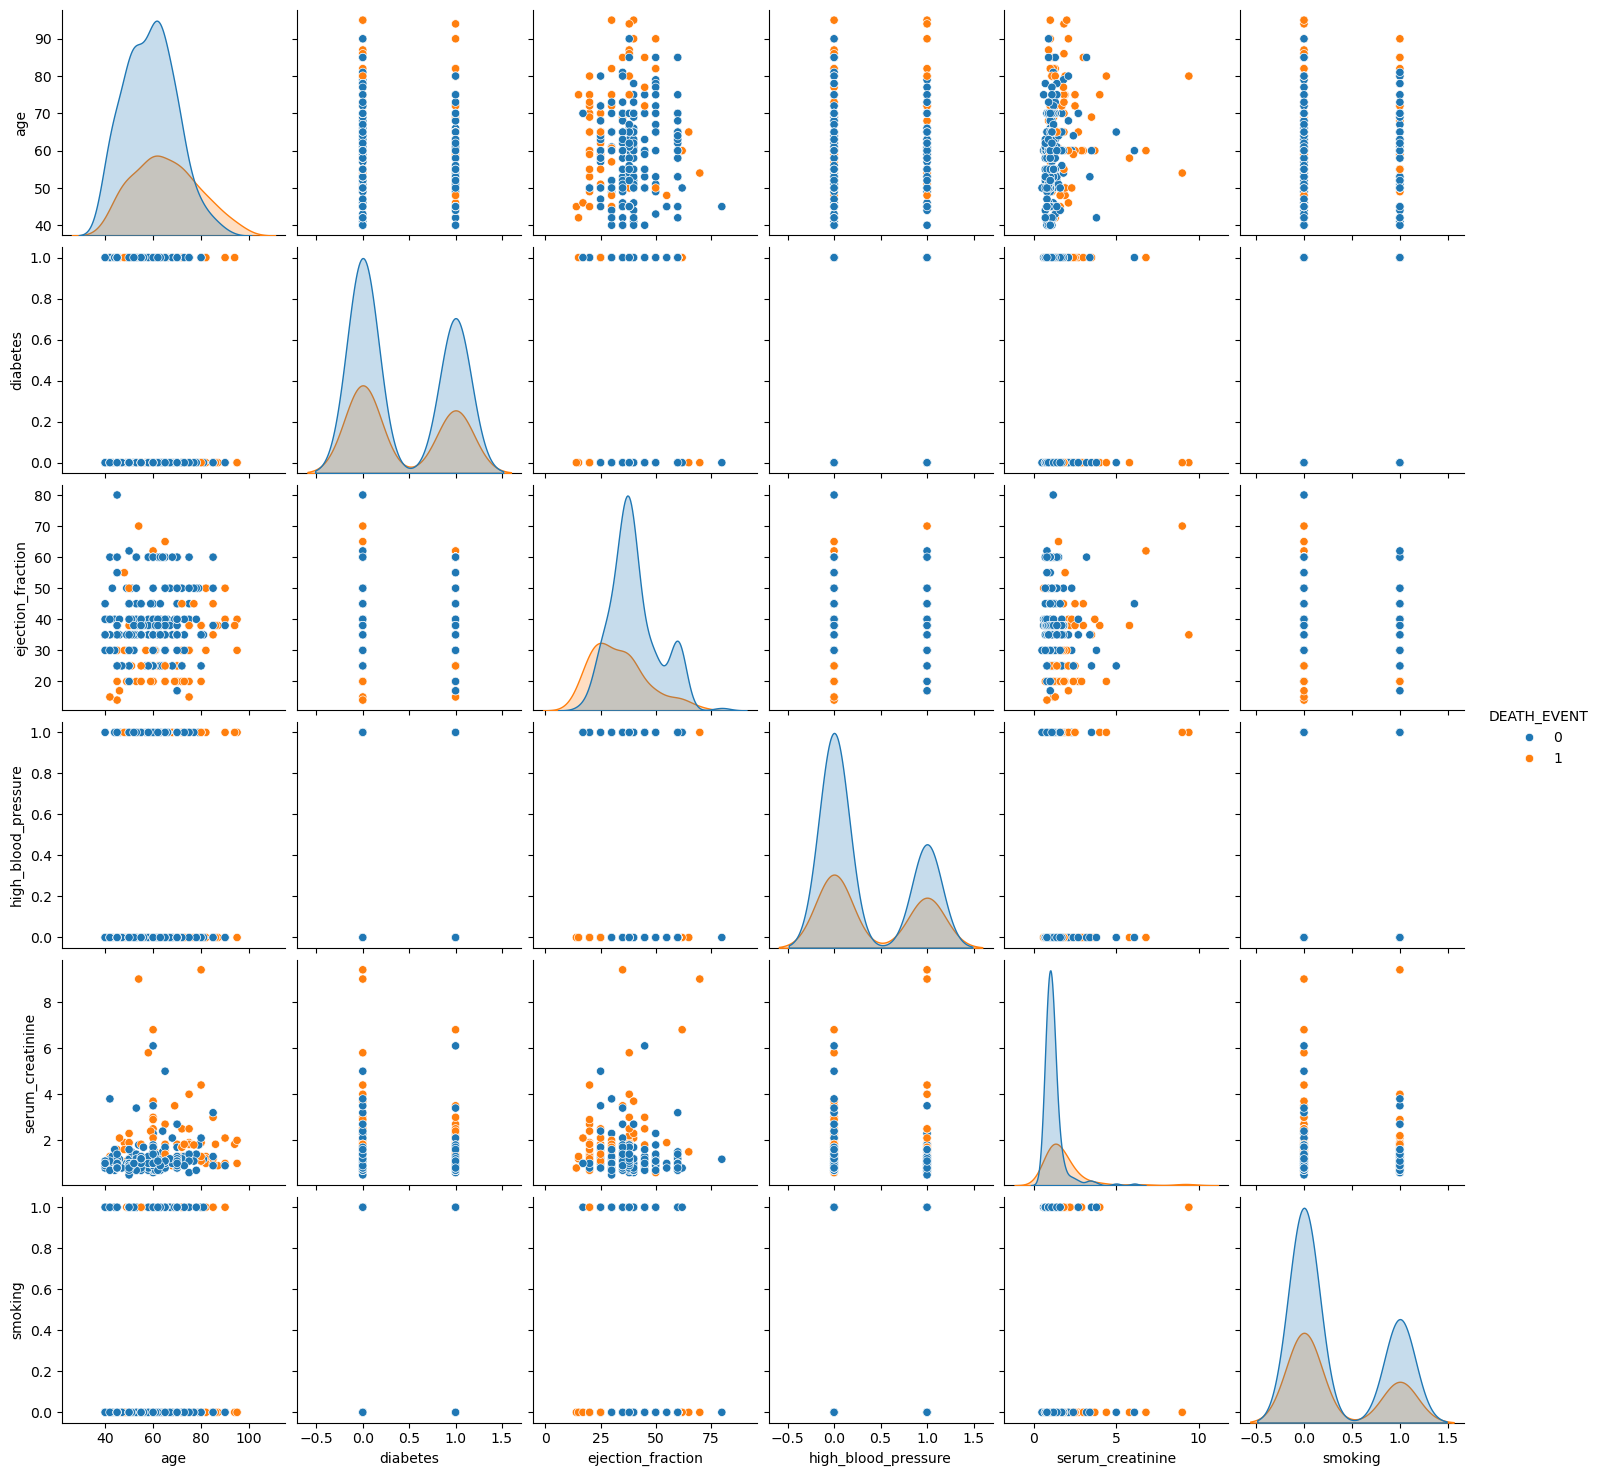

In [40]:
sns.pairplot(df, vars=['age','diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','smoking'],hue='DEATH_EVENT')
plt.show()


# 3. Model Building
# Task 9: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).


In [42]:
X=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

# Task 10: Perform train-test splitting (70% training, 30% testing) using train_test_split from sklearn.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [47]:
X_train.shape

(209, 12)

In [48]:
y_train.head()

224    0
68     1
222    0
37     1
16     1
Name: DEATH_EVENT, dtype: int64

In [49]:
y_train.shape

(209,)

# Task 11: Standardize the continuous features using StandardScaler.

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training and Evaluation
# Task 12: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, RocCurveDisplay

In [55]:
LR=LogisticRegression(max_iter=1000, random_state=42)

In [56]:
LR

LogisticRegression(max_iter=1000, random_state=42)

# Train the model

In [58]:
LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Make predictions

In [60]:
y_pred_LR = LR.predict(X_test_scaled)
y_pred_LR

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [61]:
LR.score(X_test_scaled, y_test)

0.7444444444444445

# Evaluate the model

In [63]:
print("Logistic Regression model Report:")
print(classification_report(y_test, y_pred_LR))

Logistic Regression model Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        53
           1       0.89      0.43      0.58        37

    accuracy                           0.74        90
   macro avg       0.80      0.70      0.70        90
weighted avg       0.78      0.74      0.72        90



# Train Accuracy

In [65]:
print("Training Accuracy Score:", accuracy_score(y_train, LR.predict(X_train_scaled))) #training accuracy

Training Accuracy Score: 0.861244019138756


# Testing Accuracy

In [67]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_LR))

Testing Accuracy Score: 0.7444444444444445


# Confusion matrix for Logistic Regression

In [71]:
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
conf_matrix_LR

array([[51,  2],
       [21, 16]], dtype=int64)

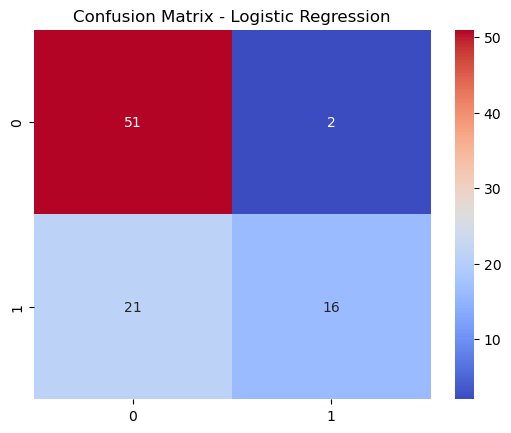

In [83]:
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Precision

In [92]:
precision_score(y_test, y_pred_LR)

0.8888888888888888

# Recall

In [95]:
recall_score(y_test, y_pred_LR)

0.43243243243243246

# F1_score

In [98]:
f1_score(y_test, y_pred_LR)

0.5818181818181818

# Task 13: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

# Train the model

In [106]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# Make predictions

In [109]:
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [111]:
knn.score(X_test_scaled, y_test)

0.6

# Evaluate the model

In [114]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        53
           1       0.60      0.08      0.14        37

    accuracy                           0.60        90
   macro avg       0.60      0.52      0.44        90
weighted avg       0.60      0.60      0.49        90



# Train Accuracy

In [117]:
print("Training Accuracy Score:", accuracy_score(y_train, knn.predict(X_train_scaled))) #training accuracy

Training Accuracy Score: 0.7942583732057417


# Testing Accuracy

In [120]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_knn))

Testing Accuracy Score: 0.6


# Task 14: Train a Decision Tree Classifier and compare its performance with other models.

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt

DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model

In [128]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

# Make predictions

In [131]:
y_pred_dt = dt.predict(X_test_scaled)
y_pred_dt

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [133]:
dt.score(X_test_scaled, y_test)

0.6888888888888889

# Evaluate the model

In [136]:
print("Decesion Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))

Decesion Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        53
           1       0.67      0.49      0.56        37

    accuracy                           0.69        90
   macro avg       0.68      0.66      0.66        90
weighted avg       0.69      0.69      0.68        90



# Train Accuracy

In [139]:
print("Training Accuracy Score:", accuracy_score(y_train, dt.predict(X_train_scaled))) #training accuracy

Training Accuracy Score: 0.9665071770334929


# Testing Accuracy

In [142]:
print("Testing Accuracy Score:", accuracy_score(y_test, y_pred_dt))

Testing Accuracy Score: 0.6888888888888889


# Comparison of Test Accuracies of Different Models

In [145]:
model_names = ['Logistic Regression', 'KNN', 'Decision Tree Classifier']

In [147]:
test_accuracies = [accuracy_score(y_test, y_pred_LR),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_dt)]

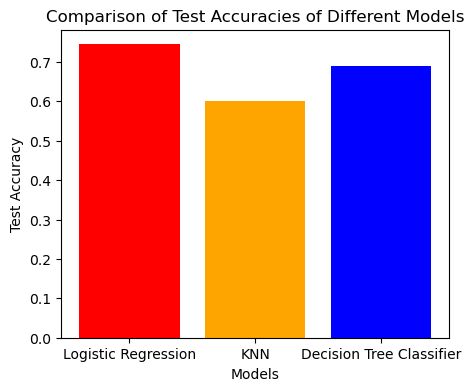

In [149]:
plt.figure(figsize=(5, 4))
plt.bar(model_names, test_accuracies, color=['red', 'orange', 'blue'])
plt.title('Comparison of Test Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.show()

# 5. Cross Validation
# Task 15: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.


# K-Fold Cross Validation

In [153]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [155]:
LR=LogisticRegression(max_iter=1000, random_state=42)

In [157]:
LR

LogisticRegression(max_iter=1000, random_state=42)

# Perform K-Fold Cross Validation

In [160]:
kfold_scores = cross_val_score(LR, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

In [162]:
kfold_scores

array([0.85714286, 0.78571429, 0.76190476, 0.76190476, 0.90243902])

In [164]:
kfold_scores.mean()

0.8138211382113821

In [166]:
print("K-Fold Cross Validation Scores (5 folds):", [f"{score:.2f}" for score in kfold_scores])
print(f"Mean K-Fold Accuracy: {kfold_scores.mean():.2f}")

K-Fold Cross Validation Scores (5 folds): ['0.86', '0.79', '0.76', '0.76', '0.90']
Mean K-Fold Accuracy: 0.81


# Task 16: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

In [169]:
from sklearn.model_selection import StratifiedKFold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [171]:
strat_kfold_scores = cross_val_score(LR, X_train_scaled, y_train, cv=strat_kfold, scoring='accuracy')
strat_kfold_scores

array([0.76190476, 0.85714286, 0.78571429, 0.76190476, 0.90243902])

# Round the scores to two decimal places

In [174]:
strat_kfold_scores_rounded = [round(score, 2) for score in strat_kfold_scores]
strat_kfold_scores_rounded

[0.76, 0.86, 0.79, 0.76, 0.9]

In [176]:
print("Stratified K-Fold Cross Validation Scores (5 folds):", strat_kfold_scores_rounded)
print(f"Mean Stratified K-Fold Accuracy: {round(strat_kfold_scores.mean(), 2)}")

Stratified K-Fold Cross Validation Scores (5 folds): [0.76, 0.86, 0.79, 0.76, 0.9]
Mean Stratified K-Fold Accuracy: 0.81


# 6. Model Improvement
# Task 17: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.


# Hyperparameter Tuning for KNN using Grid Search

In [180]:
from sklearn.model_selection import GridSearchCV

In [182]:
# Define the hyperparameters grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # How to weight the neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

In [184]:
# Initialize Grid Search for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

In [186]:
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [187]:
print("Best KNN Parameters:", grid_search_knn.best_params_)
print("Best KNN Score:", grid_search_knn.best_score_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best KNN Score: 0.751219512195122


# Hyperparameter Tuning for Decision Tree using Grid Search

In [191]:
# Define the hyperparameters grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Split quality metric
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

In [193]:
# Initialize Grid Search for Decision Tree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

In [195]:
grid_search_dt.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [196]:
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Score:", grid_search_dt.best_score_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Decision Tree Score: 0.8518002322880373


# Task 18: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

# ROC Curve for Logistic Regression

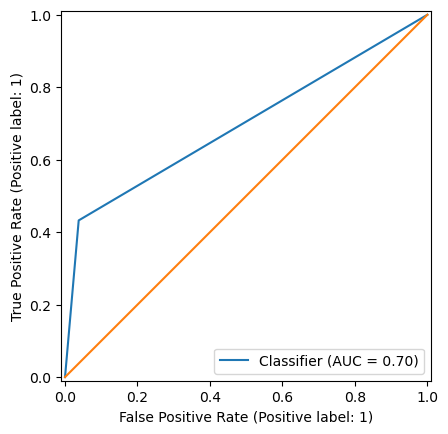

In [199]:
RocCurveDisplay.from_predictions(y_test, y_pred_LR)
plt.plot([0,1],[0,1])
plt.show()

# ROC Curve for KNN Classifier

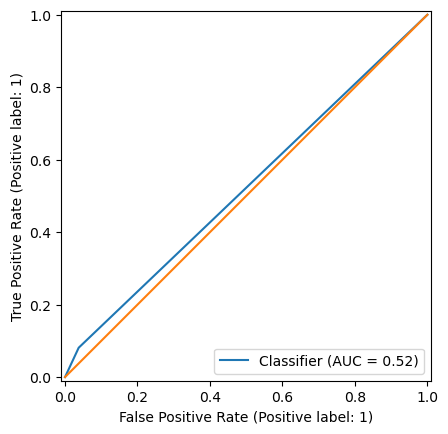

In [201]:
RocCurveDisplay.from_predictions(y_test, y_pred_knn)
plt.plot([0,1],[0,1])
plt.show()

# ROC Curve for Decision Tree Classifier

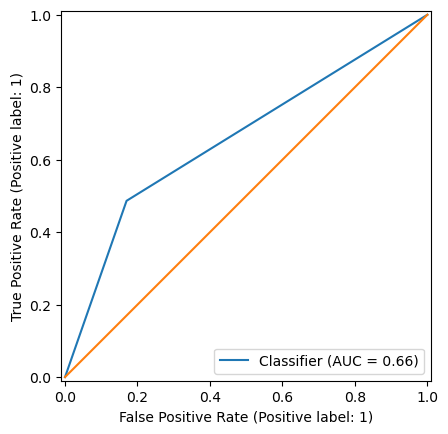

In [203]:
RocCurveDisplay.from_predictions(y_test, y_pred_dt)
plt.plot([0,1],[0,1])
plt.show()